# Homework 1-Exercise 1

In [123]:
'''
Name：Martin ECHAVARRIA GALINDO
Department: Chemical and Biological Engineering
Program: PhD in Bioengineering
Student ID: 21000651
'''

'\nName：Martin ECHAVARRIA GALINDO\nDepartment: Chemical and Biological Engineering\nProgram: PhD in Bioengineering\nStudent ID: 21000651\n'

In [124]:
import pandas as pd
import numpy as np

data=pd.read_csv('snp_price.csv')
data=data.T
print(data.shape)
print(data.head())

(452, 1258)
      0       1       2       3       4       5       6       7       8     \
V1  126.75  126.27  127.19  127.07  125.70  127.69  126.62  126.54  127.98   
V2   30.51   30.69   31.97   31.78   31.17   31.87   31.60   31.00   30.52   
V3   40.05   40.44   40.70   38.87   39.85   39.98   39.78   39.43   39.06   
V4   21.75   21.34   22.11   22.07   22.40   26.03   26.39   26.51   27.00   
V5   25.60   26.30   27.51   28.51   27.13   28.24   28.65   28.55   29.11   

      9     ...   1248   1249   1250   1251   1252   1253   1254   1255  \
V1  127.02  ...  85.78  85.85  84.93  84.49  86.05  86.26  86.07  85.40   
V2   30.27  ...  61.01  60.83  60.11  60.75  61.91  63.15  62.86  61.32   
V3   37.95  ...  56.77  57.69  57.23  57.60  58.26  58.35  57.88  56.98   
V4   26.65  ...  81.25  82.00  81.85  82.24  82.89  83.85  82.54  80.50   
V5   27.97  ...  40.90  42.03  41.87  42.17  42.18  42.84  43.12  42.34   

     1256   1257  
V1  85.09  84.32  
V2  61.90  61.78  
V3  57.23  

## 1) Take the logarithmic prices Y = log X 

In [125]:
data=data.to_numpy()
print(data)

[[126.75 126.27 127.19 ...  85.4   85.09  84.32]
 [ 30.51  30.69  31.97 ...  61.32  61.9   61.78]
 [ 40.05  40.44  40.7  ...  56.98  57.23  56.15]
 ...
 [ 25.12  24.55  24.99 ...  37.96  38.54  38.27]
 [ 40.3   40.4   40.66 ...  66.41  66.45  66.15]
 [ 40.64  40.27  41.39 ...  46.32  46.14  46.69]]


In [126]:
data=np.log(data)
print(data)

[[4.84221664 4.83842247 4.84568203 ... 4.4473461  4.44370952 4.43461908]
 [3.4180545  3.42393687 3.46479796 ... 4.11610605 4.12552018 4.12357969]
 [3.69012867 3.69981939 3.70622809 ... 4.04270033 4.04707824 4.02802668]
 ...
 [3.22366434 3.20071185 3.21847574 ... 3.63653297 3.65169666 3.6446663 ]
 [3.69635147 3.69882978 3.70524481 ... 4.19584765 4.19644979 4.19192489]
 [3.7047528  3.69560677 3.72303931 ... 3.83557383 3.83168025 3.84353001]]


## 2) For each observation time t ∈ {1, . . . , 1257}, calculate logarithmic price jumps 

In [127]:
def calc_log_jump(data):
    num_cols=data.shape[1]-1
    num_rows=data.shape[0]
    new_array=np.zeros(shape=(num_rows, num_cols))
    for id_row in range(num_rows):
        for id_col in range(num_cols):
            new_array[id_row, id_col]=data[id_row, id_col+1]-data[id_row, id_col]
    return new_array

log_price_jump_data=calc_log_jump(data)
print(log_price_jump_data)

[[-0.00379417  0.00725956 -0.00094392 ... -0.00781482 -0.00363658
  -0.00909044]
 [ 0.00588237  0.04086109 -0.0059608  ... -0.02480398  0.00941413
  -0.00194049]
 [ 0.00969072  0.0064087  -0.04600535 ... -0.01567157  0.00437791
  -0.01905156]
 ...
 [-0.02295249  0.01776389  0.00638215 ... -0.01956499  0.01516369
  -0.00703036]
 [ 0.00247832  0.00641502 -0.00988639 ... -0.01078339  0.00060214
  -0.00452489]
 [-0.00914603  0.02743253  0.00482045 ... -0.03770834 -0.00389358
   0.01184976]]


## 3) Construct the realized covariance matrix Σˆ ∈ Rˆ452×452  

In [128]:
def calc_realized_cov_matrix(data):
    num_elems=data.shape[0]
    realized_cov_matrix=np.zeros(shape=(num_elems, num_elems))
    for i in range(num_elems):
        for j in range(num_elems):
            val=(1/1257)*(np.dot(data[i],data[j]))
            realized_cov_matrix[i, j]=val
    return realized_cov_matrix

realized_cov_matrix=calc_realized_cov_matrix(log_price_jump_data)


print('The shape of the realized covariance matrix is: ', realized_cov_matrix.shape)
print('Realized covariance matrix:')
print(realized_cov_matrix)




The shape of the realized covariance matrix is:  (452, 452)
Realized covariance matrix:
[[5.35845269e-04 6.24812574e-05 3.98493742e-05 ... 4.61173857e-05
  5.40264775e-05 5.53879871e-05]
 [6.24812574e-05 2.42609108e-04 6.01798711e-05 ... 7.52021679e-05
  6.78525062e-05 8.75404542e-05]
 [3.98493742e-05 6.01798711e-05 1.55521933e-04 ... 4.73863603e-05
  4.29047678e-05 4.85833936e-05]
 ...
 [4.61173857e-05 7.52021679e-05 4.73863603e-05 ... 5.92676917e-04
  4.73411215e-05 6.49664135e-05]
 [5.40264775e-05 6.78525062e-05 4.29047678e-05 ... 4.73411215e-05
  2.81773441e-04 5.56696168e-05]
 [5.53879871e-05 8.75404542e-05 4.85833936e-05 ... 6.49664135e-05
  5.56696168e-05 1.60644502e-04]]


## 4) Compute the eigenvalues (and eigenvectors) of Σ and store them in a descending order ˆby {λˆk, k = 1, . . . , p}. 

In [129]:
from numpy import linalg

eigenvalues, eigenvectors = linalg.eig(realized_cov_matrix)

print('The total number of eigenvalues is: ', len(eigenvalues))

ordered_eigenvalues=eigenvalues[np.argsort(eigenvalues)[::-1]]
ordered_eigenvectors=eigenvectors[np.argsort(eigenvalues)[::-1]]


The total number of eigenvalues is:  452


## 5) Horn’s Parallel Analysis 

In [134]:
from sklearn.utils import shuffle
num_permuted_matrices=300
random_eig_vals=np.zeros(shape=(num_permuted_matrices, log_price_jump_data.shape[0]))
for id_permutation in range(num_permuted_matrices):
    permuted_data = np.array([shuffle(log_price_jump_data[j,:]) for j in range(log_price_jump_data.shape[0])])
    null_cov_matrix=(1/1257)*(permuted_data @ permuted_data.T)
    eigenvalues, eigenvectors = linalg.eig(null_cov_matrix)
    ordered_random_eigenvalues=eigenvalues[np.argsort(eigenvalues)[::-1]]
    random_eig_vals[id_permutation,:]=ordered_random_eigenvalues

print(random_eig_vals.shape)
    
count=np.array([np.sum(random_eig_vals[:,i] > ordered_eigenvalues[i]) for i in range(len(ordered_eigenvalues))])

p_vals=(count+1)/(num_permuted_matrices+1)
print(p_vals.shape)


(300, 452)
(452,)


In [135]:
p_value_threshold = 0.05

significant_eigenvalues = ordered_eigenvalues[p_vals < p_value_threshold]

print(f"Number eigenvalues: ", len(significant_eigenvalues))


Number eigenvalues:  13


In [136]:
mean_random = np.array([np.mean(random_eig_vals[:,i]) for i in range(len(eigenvalues))])


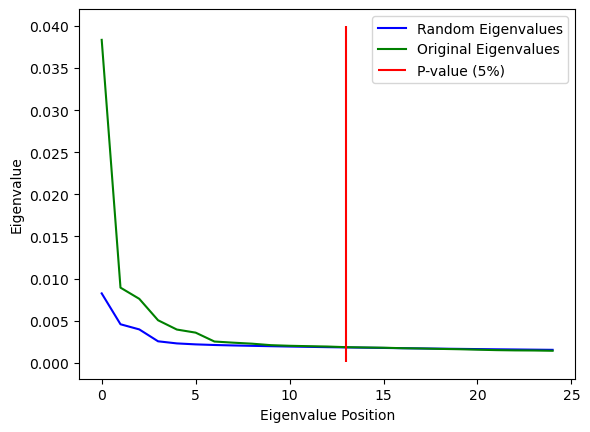

In [137]:
plt.plot(range(25),mean_random[:25], c='blue', label='Random Eigenvalues')
plt.plot(range(25),ordered_eigenvalues[:25], c='green', label='Original Eigenvalues')
plt.vlines(13, ymin=0.0001, ymax=0.04, colors='red',label='P-value (5%)')
plt.xlabel('Eigenvalue Position')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

In [ ]:
'''
The eigendecomposition of the covariance matrix provides valuable insights into the underlying structure and 
relationships between variables in a multivariate dataset, as it provides information regarding the amount of spread and
the direction of spread in the form of variance and covariance. In this case, through Horn's parallel analysis, it was possible
to demostrate that the information contained in the covariance matrix of the given dataset could be explained by using only 
13 eigenvalues, while the rest of them may be associated with the inherent noise of the data. This allows us to reduce 
the dimensionality of the data by selecting a subset of the most important components, which can lead to more efficient 
and accurate data analysis and modeling. 

'''